In [ ]:

import sys
sys.version
!pip install -Uqq fastai
!pip install torchvision
!pip install -Uqq fastbook
!pip install -Uqq fastai duckduckgo_search

In [1]:
from fastai.imports import *
from fastai.vision.all import *
from fastai.data.all import *
import fastbook
fastbook.setup_book()
from fastai.callback.preds import get_image_files
from fastai.vision.all import CategoryBlock
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url

In [2]:
path = Path("./VegetableML/vegetable-images/")

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


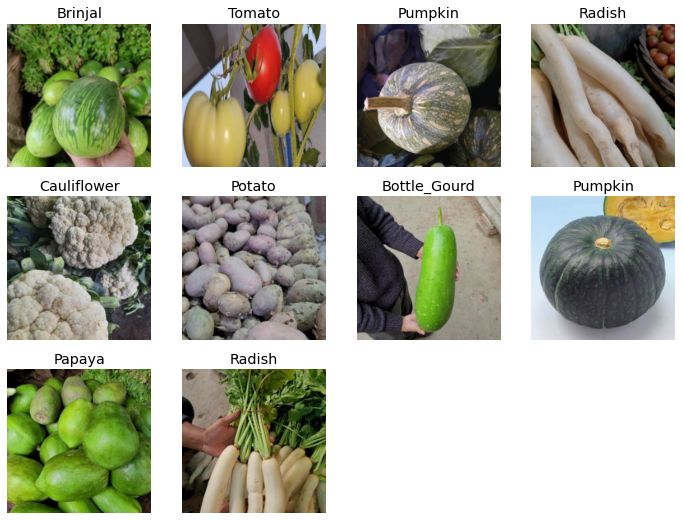

In [3]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='train',valid_name="validation"),
    get_y=parent_label,
    item_tfms=[Resize(255,method="squish")]
).dataloaders(path,bs=80)

dls.show_batch(max_n=10)

In [4]:
from fastai.callback.schedule import fine_tune
learn = vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(2)

c:\Users\Mark Hansen\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\Mark Hansen\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.172944,0.021473,0.006000,01:34


epoch,train_loss,valid_loss,error_rate,time
0,0.022807,0.010514,0.002667,01:28
1,0.005305,0.004436,0.001333,01:28


In [ ]:
learn.export("vegetables_model1.pkl")